# Network analysis of major airport newtork in europe

In [34]:
import requests
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import random
import networkx as nx
from collections import defaultdict
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [35]:
tag_airports = [
    "LHR", # London Heathrow Airport
    "CDG", # Paris-Charles de Gaulle Airport
    "AMS", # Amsterdam Airport Schiphol
    "FRA", # Frankfurt Airport
    "IST", # Istanbul Airport
    "BCN", # Barcelona-El Prat Airport
    "MAD", # Adolfo Suárez Madrid–Barajas Airport
    "MUC", # Munich Airport
    "SAW", # Sabiha Gökçen International Airport
    "FCO", # Leonardo da Vinci-Fiumicino Airport
    "LGW", # London Gatwick Airport
    "DME", # Moscow Domodedovo Airport
    "ORY", # Paris Orly Airport
    "VIE", # Vienna International Airport
    "ZRH", # Zurich Airport
    "OTP", # Henri Coandă International Airport
    "SVO", # Sheremetyevo International Airport
    "CPH", # Copenhagen Airport
    "ATH", # Athens International Airport
    "ARN", # Stockholm Arlanda Airport
    "DUB", # Dublin Airport
    "OSL", # Oslo Airport, Gardermoen
    "HAM", # Hamburg Airport
    "BRU", # Brussels Airport
    "LIS", # Lisbon Portela Airport
    "BGY", # Milan Bergamo Airport
    "HEL", # Helsinki Airport
    "MAN", # Manchester Airport
    "BUD", # Budapest Ferenc Liszt International Airport
    "PRG", # Prague Václav Havel Airport
    "WAW", # Warsaw Chopin Airport
    "EDI", # Edinburgh Airport
    "GVA", # Geneva Airport
    "DUS", # Düsseldorf Airport
    "SXF", # Berlin Schönefeld Airport
    "BLL", # Billund Airport
    "AGP", # Málaga Costa del Sol Airport
    "NCE", # Nice Côte d'Azur Airport
    "PMI", # Palma de Mallorca Airport
    "STR", # Stuttgart Airport
    "NAP", # Naples International Airport
    "LED", # Pulkovo Airport
    "LTN", # London Luton Airport
    "TLS", # Toulouse Blagnac Airport
    "BHX", # Birmingham Airport
    "LPA", # Gran Canaria Airport
    "KEF", # Keflavík International Airport
    "SZG", # Salzburg Airport
    "AYT", # Antalya Airport
    "MXP" # Milan Malpensa Airport
]

In [36]:
airports=pd.read_csv("airports_top50.csv")
fj=pd.read_csv("flights_2023_epidemy.csv")
airports.drop(airports[airports["iata"]=="SXF"].index,inplace=True)
airports.reset_index(drop=True,inplace=True)

In [21]:
flight_dict = {}
for _, row in fj.iterrows():
    source = row["dep_iata"]
    destination = row["arr_iata"]
    if source not in flight_dict:
        flight_dict[source] = []
    if destination not in flight_dict[source] and destination != source:
        flight_dict[source].append(destination)



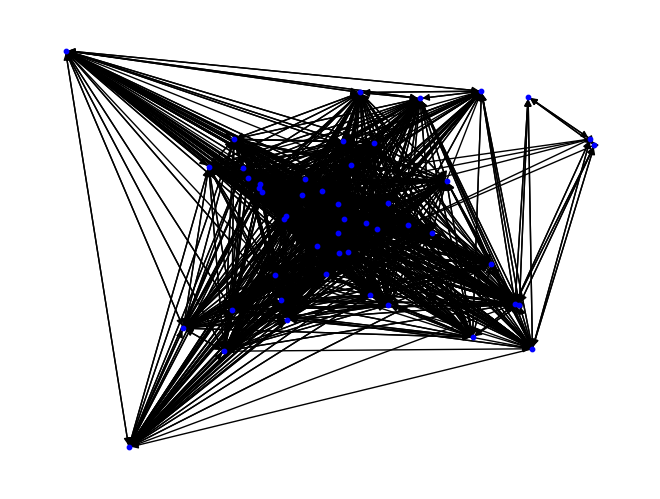

In [47]:

dest = flight_dict
airports_graph = nx.DiGraph()
for i, airport_id in enumerate(list(airports["iata"])):
    longitude, latitude = airports.loc[i,"longitude"], airports.loc[i,"latitude"]
    airports_graph.add_node(airport_id, pos=(longitude, latitude))

for i in dest.keys():
    source_airport = i.upper()
    for dest_airport in dest[i]:
        if not airports_graph.has_edge(source_airport, dest_airport.upper()):
            airports_graph.add_edge(source_airport, dest_airport.upper())


pos = nx.get_node_attributes(airports_graph, 'pos')
nx.draw(airports_graph, pos, node_size=10, node_color='blue')
plt.show()






In [49]:
#properties of the graph

print("Number of nodes: ", airports_graph.number_of_nodes())
print("Number of edges: ", airports_graph.number_of_edges())
print("Diameter (max distance between any pair of node): ", nx.diameter(airports_graph))

#clustering coefficient
print("Average clustering coefficient: ", nx.average_clustering(airports_graph))

#average shortest path length
print("Average shortest path length: ", nx.average_shortest_path_length(airports_graph))

#cluster coefficient
print("Clustering coefficient fraction of neighbour connected: ", nx.clustering(airports_graph))


Number of nodes:  49
Number of edges:  1855
Diameter (max distance between any pair of node):  3
Average clustering coefficient:  0.8869805283219605
Average shortest path length:  1.215986394557823
Clustering coefficient fraction of neighbour connected:  {'LHR': 0.9371643394199786, 'CDG': 0.8846371882086168, 'AMS': 0.86, 'FRA': 0.871245911388641, 'IST': 0.7623688155922039, 'BCN': 0.8915029061721561, 'MAD': 0.8777777777777778, 'MUC': 0.8858652575957728, 'SAW': 0.814615797958087, 'FCO': 0.9021706809396373, 'LGW': 0.8891736066623959, 'DME': 0.86, 'ORY': 0.8943308908600077, 'VIE': 0.8486961012135296, 'ZRH': 0.8972125435540069, 'OTP': 0.9048780487804878, 'SVO': 0.7580645161290323, 'CPH': 0.887450462351387, 'ATH': 0.8897219618869103, 'ARN': 0.8840392561983471, 'DUB': 0.9128314538250534, 'OSL': 0.8948491313623895, 'HAM': 0.9006400487656202, 'BRU': 0.8689817376867737, 'LIS': 0.9215625, 'BGY': 0.8826875222182723, 'HEL': 0.8896797153024911, 'MAN': 0.8950029744199881, 'BUD': 0.9061791383219955, '

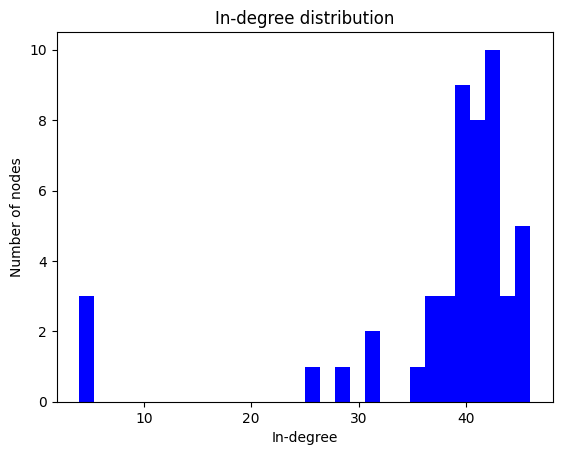

In [50]:
#in-degree distribution

in_degrees = [airports_graph.in_degree(n) for n in airports_graph.nodes()]
plt.hist(in_degrees, bins=30, color='b')
plt.xlabel('In-degree')
plt.ylabel('Number of nodes')
plt.title('In-degree distribution')
plt.show()


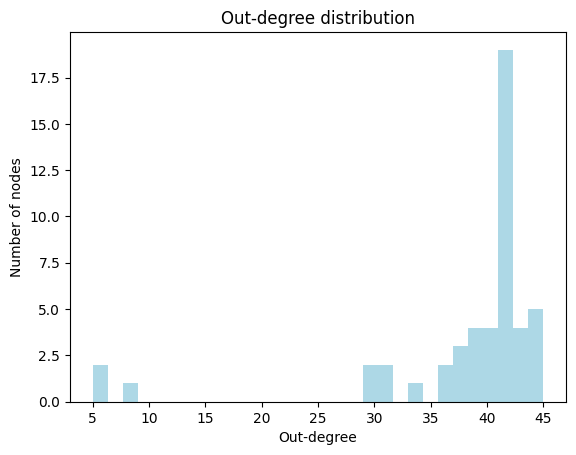

In [56]:

#out-degree distribution

out_degrees = [airports_graph.out_degree(n) for n in airports_graph.nodes()]
plt.hist(out_degrees, bins=30, color='lightblue')
plt.xlabel('Out-degree')
plt.ylabel('Number of nodes')
plt.title('Out-degree distribution')
plt.show()


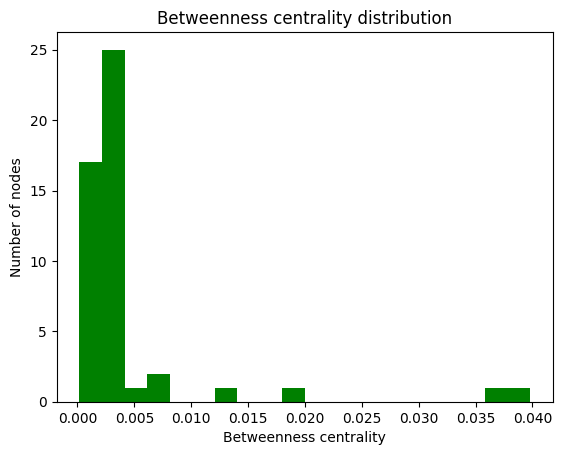

In [52]:
#betweenness centrality
betweenness = nx.betweenness_centrality(airports_graph)
plt.hist(betweenness.values(), bins=20, color='g')
plt.xlabel('Betweenness centrality')
plt.ylabel('Number of nodes')
plt.title('Betweenness centrality distribution')
plt.show()

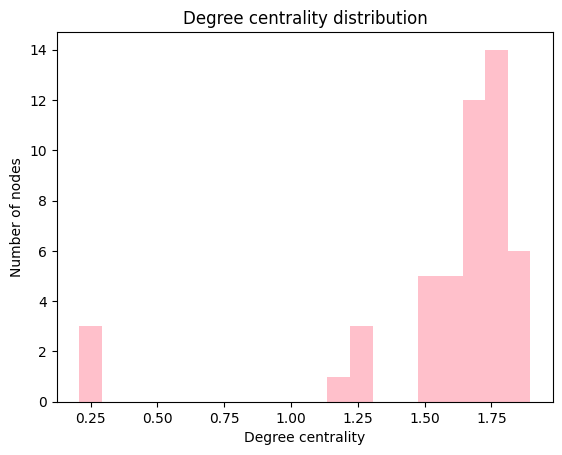

In [55]:
#degree centrality
degree = nx.degree_centrality(airports_graph)
plt.hist(degree.values(), bins=20, color='pink')
plt.xlabel('Degree centrality')
plt.ylabel('Number of nodes')
plt.title('Degree centrality distribution')
plt.show()


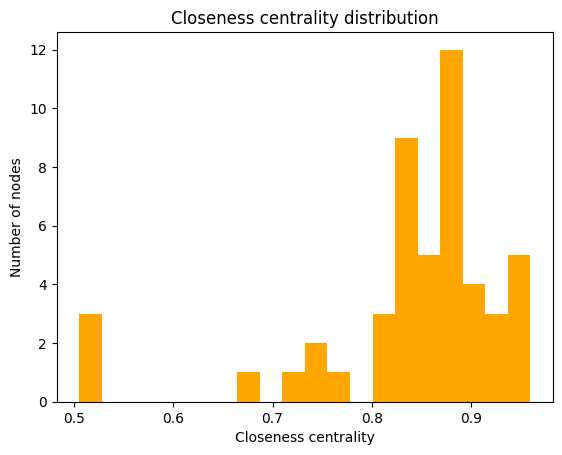

In [54]:
#closeness centrality
closeness = nx.closeness_centrality(airports_graph)
plt.hist(closeness.values(), bins=20, color='orange')
plt.xlabel('Closeness centrality')
plt.ylabel('Number of nodes')
plt.title('Closeness centrality distribution')
plt.show()